<a href="https://colab.research.google.com/github/RCML2016/Regression/blob/master/RandomForest_DataforHandSignature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data has been extracted from SKLEARN DATA SETS

Creating a Random Forest Model and COfusion Matrix.

In [40]:
import pandas as pd
from sklearn.datasets import load_digits

digits=load_digits()

#dir(digits)

<Figure size 432x288 with 0 Axes>

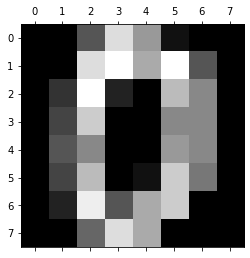

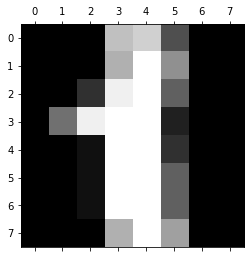

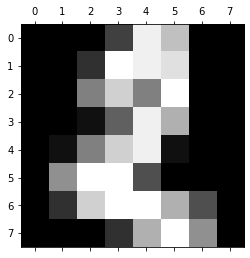

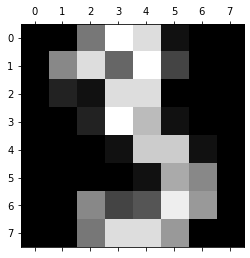

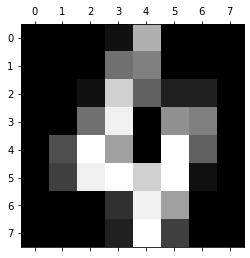

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()

for i in range (5):
  plt.matshow(digits.images[i])

In [42]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [43]:
df=pd.DataFrame (digits.data)
df['Target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [44]:
#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.drop(['Target'],axis='columns'),digits.target,test_size=0.2)

#len(x_train)
#len(x_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfModel=RandomForestClassifier(n_estimators=100)
model_train=rfModel.fit(x_train, y_train)

model_train

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
model_train.score(x_test,y_test)

0.9861111111111112

In [48]:
y_predict=model_train.predict(x_test)

from sklearn.metrics import confusion_matrix

confMatrix=confusion_matrix(y_test,y_predict)
confMatrix

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  1],
       [ 0,  0,  0,  0,  1,  1,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 42]])

Text(69.0, 0.5, 'Truth')

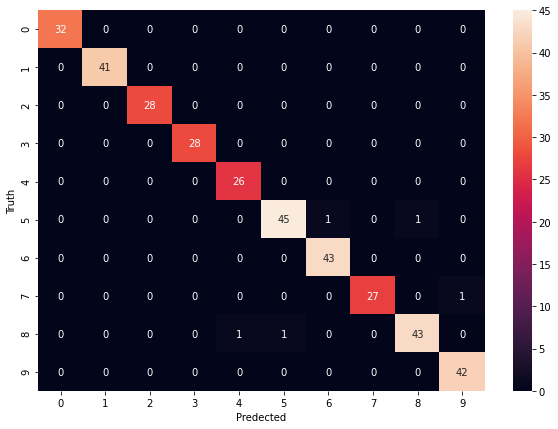

In [49]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confMatrix,annot=True)
plt.xlabel('Predected')
plt.ylabel('Truth')